# Intro to Machine Learning in Python

This guide covers the very basics of running machine learning algorithms in Python. 


## Assumptions

This guide assumes you are using [CSV files](https://en.wikipedia.org/wiki/Comma-separated_values) for your data. Using files of different structured types is made easy with `pandas` (which we are using), but is beyond the scope of this guide.

It is also assumed that you already understand the terminology around machine learning. If you are comfortable with the following terms:

* table
* row
* column
* data frame
* vector
* feature
* dependent variable (y - value)
* independent variable (X - x values)
* categorical variable
* model
* fit
* prediction

... you will be fine. Otherwise take a look at [How To Talk About Data in Machine Learning (Terminology from Statistics and Computer Science)](https://machinelearningmastery.com/data-terminology-in-machine-learning/) for a quick primer.

## Which Python version should I use?

There are two main versions of Python in use today: Python 2 and Python 3. Neither is inherently better than the other for day-to-day use, but in mainstream production systems some users are forced to use one or the other. My recommendation is this:

*Use **Python 2** if any of the following are true*:
* You know you will be shipping code to a production environment that does not support Python3.
* You are using a specific library that is only available in Python 2.

Otherwise, use Python 3.

All examples in this document are in Python 3, but the Python 2 versions are almost identical.

## The Basic Steps

The most simple pattern to use for machine learning is:

1. **Ingest**: import the data into a local data structure
1. **Groom**: modify the data into some schema
1. **Split**: break the data into a training set and a testing set
1. **Select**: pick an algorithm apporpriate for the data and the situation
1. **Fit**: build a model of the data using the selected algorithm
1. **Predict**: compute new results from the model
1. **Display**: show a range of predictions from the model

Steps 6 and 7 are both results.  Step 6 is numeric results, and Step 7 is graphical results.

## Libraries

This guide uses:

* `sklearn` for all machine learning algorithms
* `scipy` to handle some of the under-the-hood workings of `sklearn` (uses `numpy`)
* `pandas` to help import and groom data
* `matplotlib` for displaying graphical representations of the output

You will need to install them on your computer first:

```bash
$ pip install sklearn scipy pandas matplotlib
```

Then just import them in the normal way:

In [3]:
import pandas as pd
import sklearn.model_selection    # grooming
import sklearn.linear_model       # linear regression
import matplotlib.pyplot as plt

## Step 1 - Ingest

Loading a CSV file is easy with `pandas`:

```python
dataset = pd.read_csv(filename)
```

`dataset` is now a **DataFrame** containing the full contents of your input file and with smart assumptions about the types of values in each column.

In [19]:
dataset = pd.read_csv('data1.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Step 2 - Groom

### Dependent and independent variables

For any learning algorithm to work, data needs to be broken into the table of data that represents the independent variables and a column that represents the dependent variables. If you are using all columns of your frame, and if the last column is the dependent variable and the other colums are your dependent variables, then you just need to do this:

```python
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
```

`pandas` makes it very simple to re-build your table in a variety of ways and to extract just the colums you want or need for your specific purpose. For instance, if you *only* wanted columns two and three as independent variables, and if your dependent variable was in column 0, then the above could be re-written as:

```python
X = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, 0].values
```

### Missing data

Sometimes your frame will not have all the data you need. One simple way to handle this is to **impute** (guess) the missing values

```python
range = [2, 5]  # the bounds of columns to use
imputer = sklearn.preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imputer = imputer.fit(X[:, range[0]:range[1]])
X = X[:, range[0]:range[1]] = imputer.transform(X[:, range[0]:range[1]])
```

For our example there is no missing data.

### Categorical data

Sometimes a column in your frame is meant to be considered categorical.

If the independent variables contain a categorical column, fix it like this:

```python
index = 3  # the column to change to categorical
label_encoder = sklearn.preprocessing.LabelEncoder()
X[:, index] = label_encoder.fit_transform(X[:, index])
one_hot_encoder = sklearn.preprocessing.OneHotEncoder(categorical_features=[index])
X = one_hot_encoder.fit_transform(X).toarray()
```

If the dependent variable is categorical, fix it like this:

```python
label_encoder = sklearn.preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)
```

For our example there is no categorical data.

In [20]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [21]:
X

array([[  1.1],
       [  1.3],
       [  1.5],
       [  2. ],
       [  2.2],
       [  2.9],
       [  3. ],
       [  3.2],
       [  3.2],
       [  3.7],
       [  3.9],
       [  4. ],
       [  4. ],
       [  4.1],
       [  4.5],
       [  4.9],
       [  5.1],
       [  5.3],
       [  5.9],
       [  6. ],
       [  6.8],
       [  7.1],
       [  7.9],
       [  8.2],
       [  8.7],
       [  9. ],
       [  9.5],
       [  9.6],
       [ 10.3],
       [ 10.5]])

In [22]:
y

array([  39343.,   46205.,   37731.,   43525.,   39891.,   56642.,
         60150.,   54445.,   64445.,   57189.,   63218.,   55794.,
         56957.,   57081.,   61111.,   67938.,   66029.,   83088.,
         81363.,   93940.,   91738.,   98273.,  101302.,  113812.,
        109431.,  105582.,  116969.,  112635.,  122391.,  121872.])

## Step 3 - Split

Your data should be split into *training* data and *testing* data. With large datasets you may also include a validation set.

To split the data into two groups, with 80% of the data in the training set and 20% in the test set:

In [23]:
test_set_size = 0.2
seed = 0  # for repeatability while testing, should be a random number in practice
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y,
    test_size=test_set_size,
    random_state=seed,
    )

In [24]:
X

array([[  1.1],
       [  1.3],
       [  1.5],
       [  2. ],
       [  2.2],
       [  2.9],
       [  3. ],
       [  3.2],
       [  3.2],
       [  3.7],
       [  3.9],
       [  4. ],
       [  4. ],
       [  4.1],
       [  4.5],
       [  4.9],
       [  5.1],
       [  5.3],
       [  5.9],
       [  6. ],
       [  6.8],
       [  7.1],
       [  7.9],
       [  8.2],
       [  8.7],
       [  9. ],
       [  9.5],
       [  9.6],
       [ 10.3],
       [ 10.5]])

In [25]:
X_train

array([[  9.6],
       [  4. ],
       [  5.3],
       [  7.9],
       [  2.9],
       [  5.1],
       [  3.2],
       [  4.5],
       [  8.2],
       [  6.8],
       [  1.3],
       [ 10.5],
       [  3. ],
       [  2.2],
       [  5.9],
       [  6. ],
       [  3.7],
       [  3.2],
       [  9. ],
       [  2. ],
       [  1.1],
       [  7.1],
       [  4.9],
       [  4. ]])

In [26]:
X_test

array([[  1.5],
       [ 10.3],
       [  4.1],
       [  3.9],
       [  9.5],
       [  8.7]])

In [27]:
y

array([  39343.,   46205.,   37731.,   43525.,   39891.,   56642.,
         60150.,   54445.,   64445.,   57189.,   63218.,   55794.,
         56957.,   57081.,   61111.,   67938.,   66029.,   83088.,
         81363.,   93940.,   91738.,   98273.,  101302.,  113812.,
        109431.,  105582.,  116969.,  112635.,  122391.,  121872.])

In [28]:
y_train

array([ 112635.,   55794.,   83088.,  101302.,   56642.,   66029.,
         64445.,   61111.,  113812.,   91738.,   46205.,  121872.,
         60150.,   39891.,   81363.,   93940.,   57189.,   54445.,
        105582.,   43525.,   39343.,   98273.,   67938.,   56957.])

## Step 4 - Select

This is the step where the most decision-making needs to occur. There are many learning algorithms, each with pros and cons, and selecting the right one depends on a variety of factors:

* the type of prediction being made
* the shape of the data
* the size of the data set
* the significance of being slightly wrong in the predictions

Luckily, most of the steps in this guide stay the same, and generally all you will need to do is choose a different algorithm here for generally similar prediction scenarios.

To perform a traditional linear regression:

In [29]:
regressor = sklearn.linear_model.LinearRegression()

## Step 5 - Fit (Trains the Algorithm to Create the Model)

Once you've instantiated a regressor, you build a model to fit the data with a single line of code:

In [31]:
# note that this will give a RuntimeWarning the first time it's run in a clean environment
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Step 6 - Predict

Now you can make predictions from the model:

In [32]:
y_pred = regressor.predict(X_test)

## Step 7 - Display

Finally, to display the test data, training data, and predictions graphically:

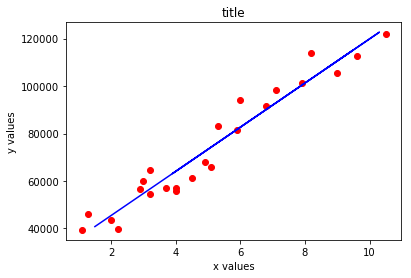

In [33]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('title')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

## Putting it all together

Because so many of the steps are similar for data preprocessing and display, I've created classes that handle most of the gruntwork for you:

In [34]:
from preprocessing import preprocess
from plotting import plot

# see preprocessor.py
X, y, X_train, y_train, X_test, y_test = preprocess(
    filename='data2.csv',
    use_only_indexes=(1, -1),
    test_set_size=0.0,
    test_set_random_seed=0,
)

# fitting simple linear regression to the training set for comparison
simple_regressor = sklearn.linear_model.LinearRegression()
simple_regressor.fit(X_train, y_train)

# fitting polynomial linear regression to the training set
polynomial_features = sklearn.preprocessing.PolynomialFeatures(degree=4)
X_train_poly = polynomial_features.fit_transform(X_train)
polynomial_regressor = sklearn.linear_model.LinearRegression()   # change algorithm choice here
polynomial_regressor.fit(X_train_poly, y_train)

# predicting a new result with simple linear regression
predicted_salary = simple_regressor.predict(6.5)
print('prediction with simple linear regression:', predicted_salary)

# predicting a new result with polynomial linear regression
predicted_salary = polynomial_regressor.predict(
        polynomial_features.fit_transform(6.5)
        )
print('prediction with polynomial linear regression:', predicted_salary)

prediction with simple linear regression: [ 330378.78787879]
prediction with polynomial linear regression: [ 158862.45265146]


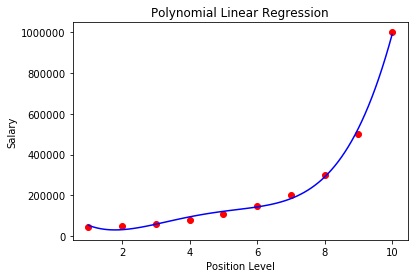

In [35]:
# visualizing the polynomial regression results
plot(
    polynomial_regressor,
    X_train,
    y_train,
    transformer=polynomial_features.fit_transform,
    interval=0.1,
    title='Polynomial Linear Regression',
    xlabel='Position Level',
    ylabel='Salary',
    )

## References

* [Machine Learning A-Z™: Hands-On Python & R](https://www.udemy.com/machinelearning/learn/v4/overview)
  * Most of the code in this repo was inspired by what I learned in that course. I have adapted it heavily for easier re-use and readability.

* [How To Talk About Data in Machine Learning (Terminology from Statistics and Computer Science)](https://machinelearningmastery.com/data-terminology-in-machine-learning/)

* [pandas](http://pandas.pydata.org/)

* [SciKit-Learn](http://scikit-learn.org/) (also known as `sklearn`)

* [MatPlotLib](https://matplotlib.org/)
